In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
import pandas as pd

# List of encodings to try
encodings = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']

# Try reading the CSV file with different encodings
for encoding in encodings:
    try:
        data = pd.read_csv("../input/sms-spam-collection-dataset/spam.csv", encoding=encoding)
        # If reading succeeds, print information about the DataFrame
        print("Successfully read CSV with encoding:", encoding)
        print(data.info())
        break  
    except UnicodeDecodeError:
        # If reading fails, continue to the next encoding
        print("Failed to read CSV with encoding:", encoding)



Failed to read CSV with encoding: utf-8
Successfully read CSV with encoding: latin1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data=data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [5]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
pattern={'ham':1,'spam':0}
data['v1_encoded']=data['v1'].map(pattern)

In [7]:
data.rename(columns = {"v1":"Target", "v2":"Text",'v1_encoded':'target_encoded'}, inplace = True)
data.head()

,Target,Text,target_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1


Text(0, 0.5, 'Number of Data points')

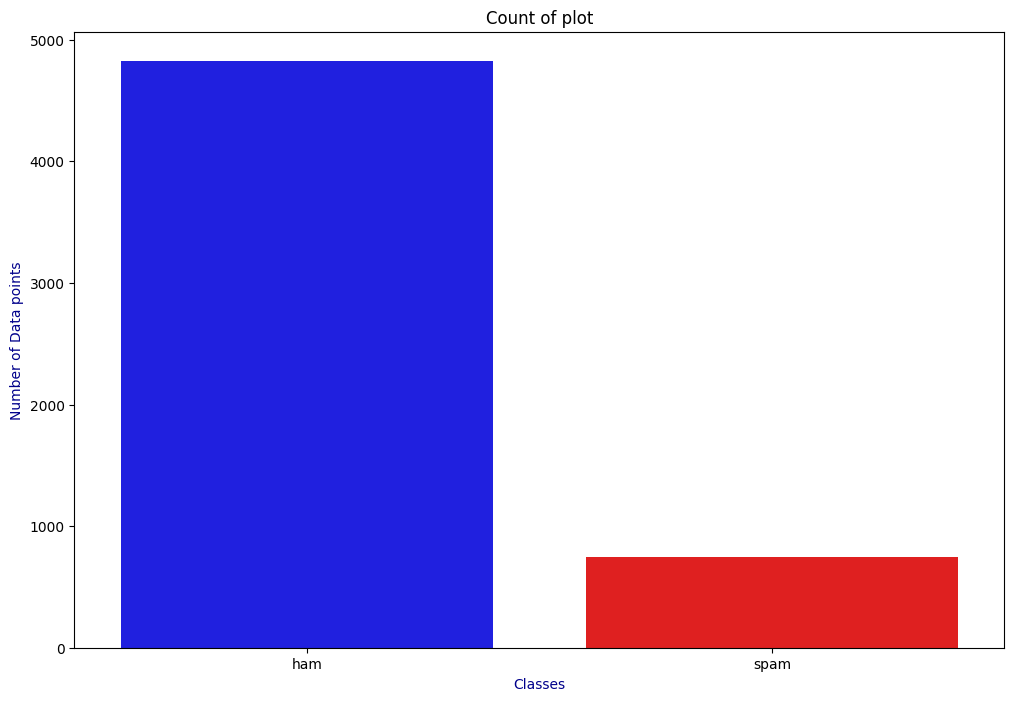

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
fg = sns.countplot(x= data["Target"], palette= ['blue','red'])
fg.set_title("Count of plot", color="black")
fg.set_xlabel("Classes", color="darkblue")
fg.set_ylabel("Number of Data points", color="darkblue")

#### Total number of character

In [9]:
data['total_characters']=data['Text'].apply(len)

In [10]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize

In [11]:
import re
def tokenize_sentences(text):
    return len(sent_tokenize(text))
def tokenize_word(text):
    return len(word_tokenize(text))

data['total_sentence'] = data['Text'].apply(tokenize_sentences)
data['total_word'] = data['Text'].apply(tokenize_word)
data.head()

,Target,Text,target_encoded,total_characters,total_sentence,total_word
0,ham,"Go until jurong point, crazy.. Available only ...",1,111,2,23
1,ham,Ok lar... Joking wif u oni...,1,29,2,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,155,2,37
3,ham,U dun say so early hor... U c already then say...,1,49,1,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",1,61,1,15


In [12]:
data.describe()

,target_encoded,total_characters,total_sentence,total_word
count,5572.000000,5572.000000,5572.000000,5572.000000
mean,0.865937,80.118808,1.991565,18.501256
std,0.340751,59.690841,1.501427,13.637056
min,0.000000,2.000000,1.000000,1.000000
25%,1.000000,36.000000,1.000000,9.000000
50%,1.000000,61.000000,1.500000,15.000000
75%,1.000000,121.000000,2.000000,27.000000
max,1.000000,910.000000,38.000000,219.000000


In [13]:
data.isnull().sum()

Target              0
Text                0
target_encoded      0
total_characters    0
total_sentence      0
total_word          0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

<Figure size 1200x800 with 0 Axes>

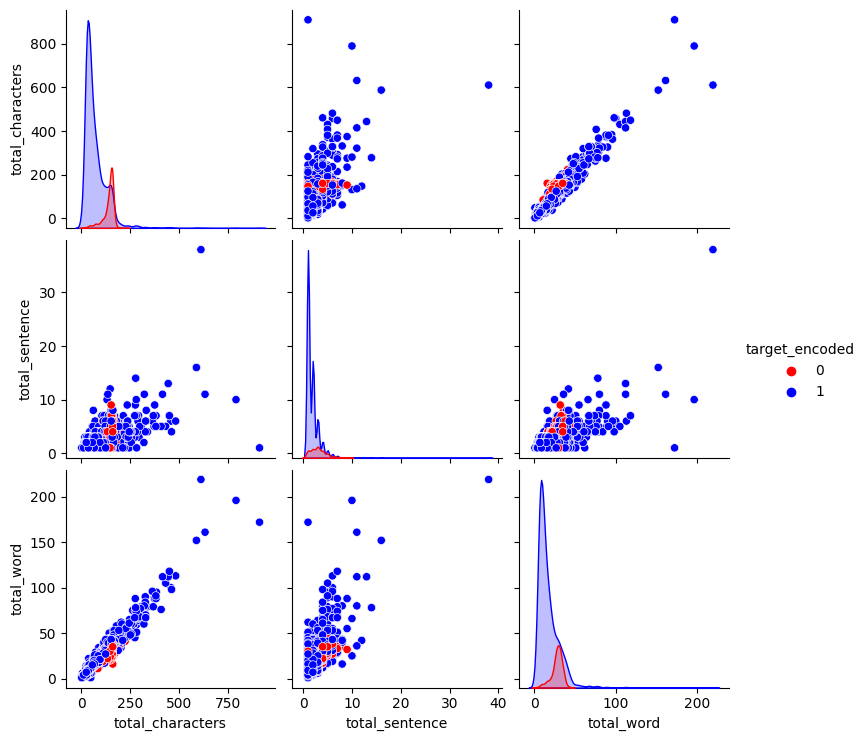

In [14]:

plt.figure(figsize=(12, 8))
fg = sns.pairplot(data=data, hue="target_encoded",palette=['red','blue'])
plt.show(fg)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

<Figure size 1200x800 with 0 Axes>

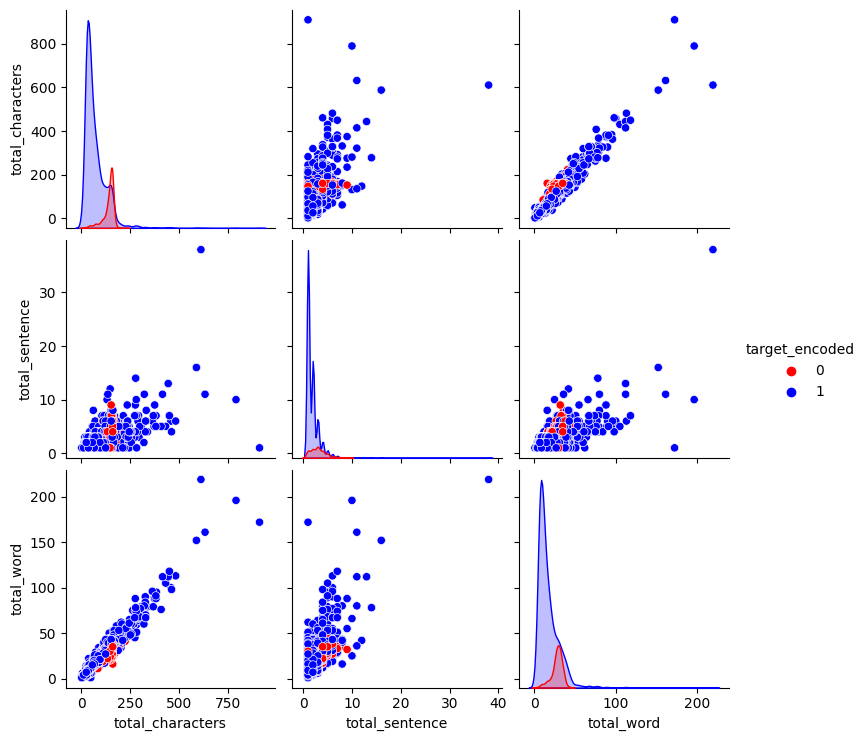

In [15]:

plt.figure(figsize=(12, 8))
fg = sns.pairplot(data=data, hue="target_encoded",palette=['red','blue'])
plt.show(fg)


In [16]:
import re

def text_cleaning(text):
    # Remove all special characters
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    return cleaned_text

# Apply the text_cleaning function to the 'Text' column and create a new column 'clean_text'
data['clean_text'] = data['Text'].apply(text_cleaning)


In [17]:
data['clean_text'][0]

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [18]:
def tokenize(text):
    return word_tokenize(text)
data['tokenize_text']=data['clean_text'].apply(tokenize)

In [19]:
print(data['tokenize_text'][0])

['Go', 'until', 'jurong', 'point', 'crazy', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'Cine', 'there', 'got', 'amore', 'wat']


In [20]:
print(data['clean_text'][0])

Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat


In [21]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stop(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    res = [word for word in tokens if word not in stop_words]
    return res

# Assuming you already have 'tokenize_text' column
data['removed_text'] = data['clean_text'].apply(remove_stop)


In [22]:
print(data['removed_text'][0])

['Go', 'jurong', 'point', 'crazy', 'Available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'Cine', 'got', 'amore', 'wat']


In [23]:
from nltk.stem.wordnet import WordNetLemmatizer

In [24]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/ 

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [25]:
import nltk

# Reset NLTK data path to default locations
nltk.data.path = nltk.data.path + ['/usr/share/nltk_data']

# Download the WordNet corpus
nltk.download('wordnet')

lemma=WordNetLemmatizer()


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
def lemmatize_word(text):
    res=[lemma.lemmatize(word) for word in text]
    return res
data["Lemmatized_Text"] = data["removed_text"].apply(lemmatize_word)

In [27]:
def join_sent(words):
    return ' '.join(words)
data['corpus']=data['Lemmatized_Text'].apply(join_sent)

In [28]:
data['corpus'][0]

'Go jurong point crazy Available bugis n great world la e buffet Cine got amore wat'

In [29]:
data.columns

Index(['Target', 'Text', 'target_encoded', 'total_characters',
       'total_sentence', 'total_word', 'clean_text', 'tokenize_text',
       'removed_text', 'Lemmatized_Text', 'corpus'],
      dtype='object')

In [30]:
y=data['target_encoded']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['corpus']).toarray()
X.dtype

dtype('float64')

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
models = [MultinomialNB(), 
               RandomForestClassifier(),
               KNeighborsClassifier(), 
               SVC()]
for cls in models:
    cls.fit(X_train, y_train)

In [35]:
from sklearn.pipeline import Pipeline   
pipe_dict = {0: "NaiveBayes", 1: "RandomForest", 2: "KNeighbours",3: "SVC"}
from sklearn.model_selection import cross_val_score
for i, model in enumerate(models):
    cv_score = cross_val_score(model, X_train,y_train,scoring="accuracy", cv=10)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

NaiveBayes: 0.958265 
RandomForest: 0.973074 
KNeighbours: 0.899260 
SVC: 0.970604 
